<a href="https://colab.research.google.com/github/Atharvnam/Codsoft-Internship/blob/main/Codsoft_DataScience_Task_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task : 1 Titanic Survival Prediction

Batch : A24

Domain : Data *Science*

## Task : TITANIC SURVIVAL PREDICTION



*   Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

*   The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived




Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read The Data

In [2]:
titanic_data = pd.read_csv("/content/Titanic-Dataset.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check Null Values In Data

In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Column Age , Cabin and Embarked has Null Values

Column : Age

In [8]:
# We Will Fill Null Values With Median.
age_median = titanic_data['Age'].median()
titanic_data['Age'] = titanic_data['Age'].fillna(age_median).round(decimals=1)

In [9]:
titanic_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Column : Cabin

In [10]:
# We will remove the 'cabin' column because it contains significant amount of missing values.
titanic_data.drop(columns='Cabin',inplace=True)

Column : Embarked

In [11]:
# Count the embarked values.
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# We will replace missing values with mode.
embarked_mode = titanic_data['Embarked'].mode
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(embarked_mode)

In [13]:
titanic_data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [14]:
#Last check null values in dataset
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Hence, Now Data is Cleaned.

# Analyze The Data By Visualisation

For visualisation we will use seaborn library

Import Library

In [16]:
import seaborn as sns

Survived

In [17]:
 # for survival varaible descibe as 0 = no and 1 = yes.
 titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

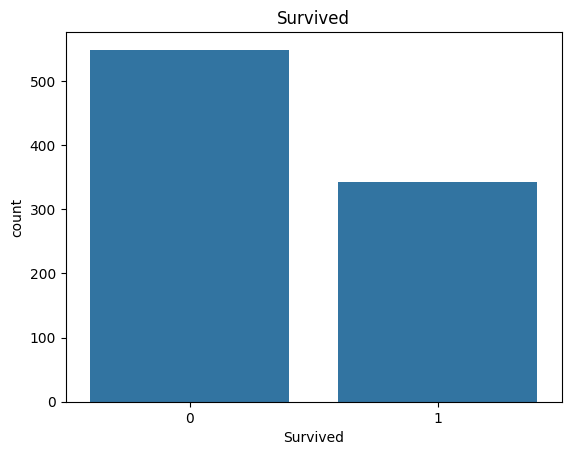

In [18]:
sns.countplot(data=titanic_data,x='Survived').set_title("Survived")
sns.set_style("darkgrid")

Pclass

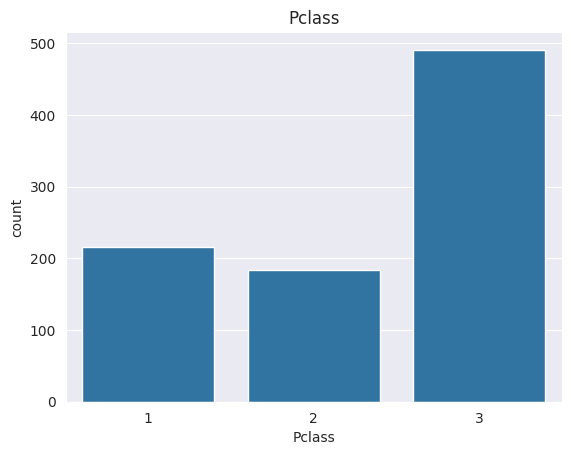

In [19]:
# Pclass variables described as :
# 1st = Upper
# 2nd = Middle
# 3rd = Lower
sns.countplot(data=titanic_data,x='Pclass').set_title("Pclass")
sns.set_style("darkgrid")

Sex (Gender)

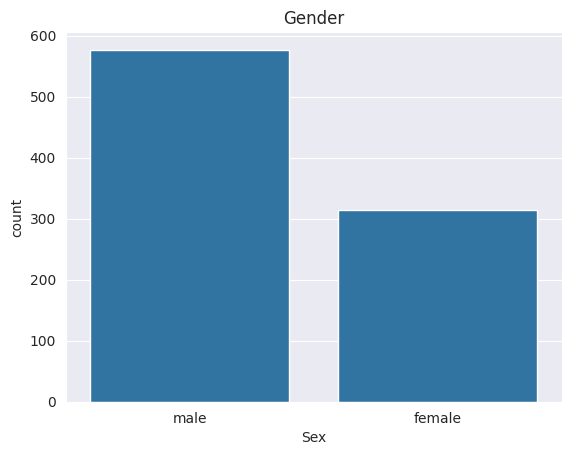

In [20]:
sns.countplot(data=titanic_data,x='Sex').set_title("Gender")
sns.set_style("darkgrid")

Age

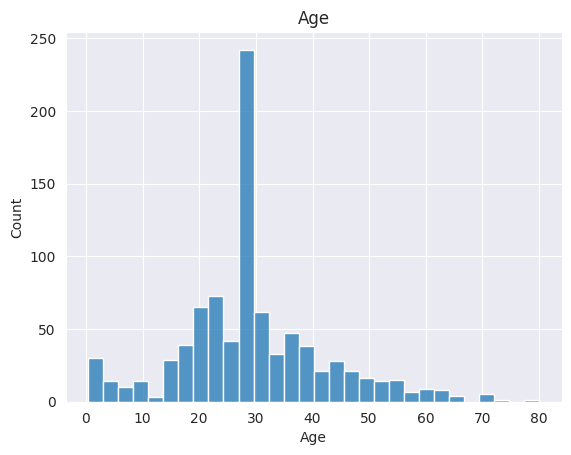

In [21]:
sns.histplot(data=titanic_data,x='Age').set_title("Age")
plt.show()

# Analyze survival with respect to other features





Analyze survival with respect to pclass

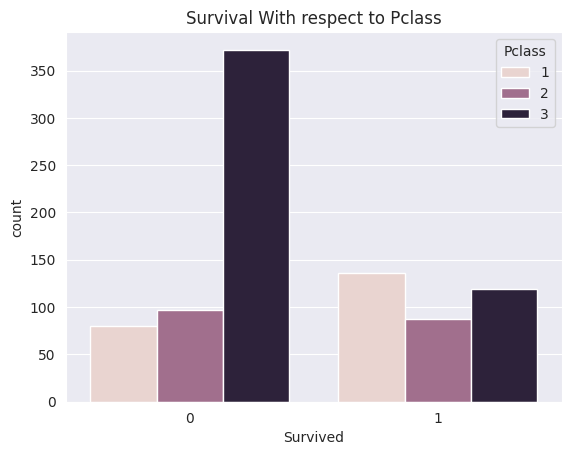

In [22]:
# Pclass variables described as :
# 1st = Upper
# 2nd = Middle
# 3rd = Lower
sns.countplot(data=titanic_data,x='Survived', hue='Pclass').set_title("Survival With respect to Pclass")
sns.set_style("darkgrid")
plt.show()

Analyze survival with respect to sex (gender)



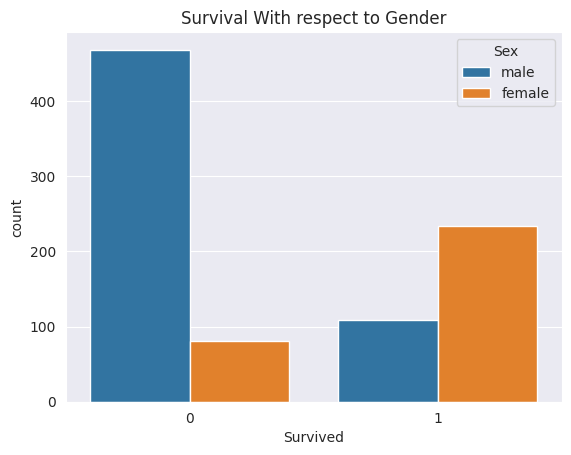

In [23]:
sns.countplot(data=titanic_data,x='Survived', hue='Sex').set_title("Survival With respect to Gender")
sns.set_style("darkgrid")
plt.show()

In [24]:
titanic_data['Sex'].head()


0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

Analyze survival with respect to age

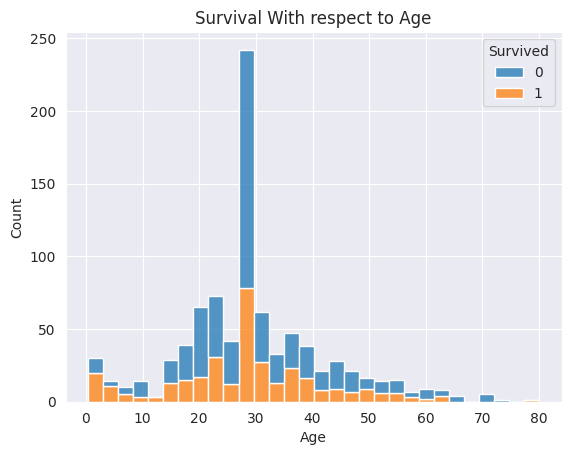

In [25]:
sns.histplot(data=titanic_data,x='Age', hue='Survived' , multiple='stack').set_title("Survival With respect to Age")
plt.show()

Analyze survival with respect to fare

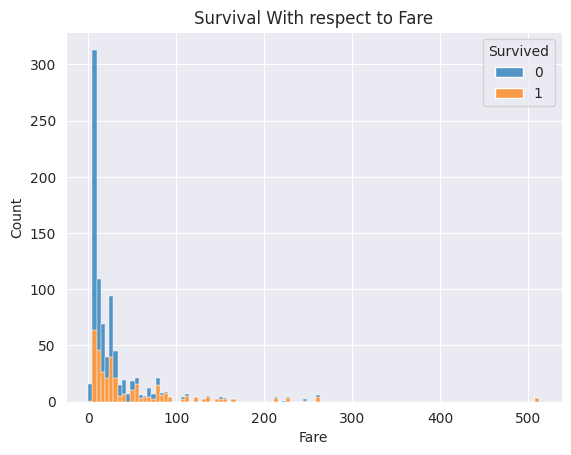

In [26]:
sns.histplot(data=titanic_data,x='Fare', hue='Survived' , multiple='stack').set_title("Survival With respect to Fare")
plt.show()

Before modeling the data, transform gender(Sex) into numeric
*   Male - 1
*   Female - 0


To do this we will use labelencoder library from sklearn

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic_data['Sex'] = labelencoder.fit_transform(titanic_data['Sex'])

In [28]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [29]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,Q


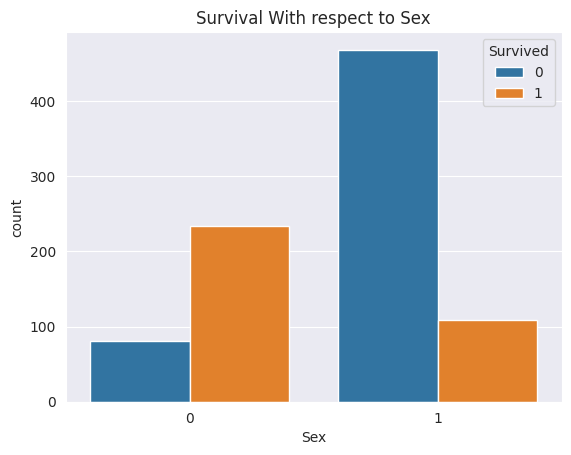

In [30]:
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived']).set_title("Survival With respect to Sex")
sns.set_style("darkgrid")
plt.show()

Now to predict we need pclass , survived and gender

We wil drop unecessary column from data which we dont need for prediction.

In [31]:
titanic_data.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Fare","Age", "Embarked"],inplace=True)

In [32]:
titanic_data.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


# Model For Prediction

In [33]:
#  First, we need to divide our data into features (X) and labels (y).
X=titanic_data[['Sex', 'Pclass']]
Y=titanic_data['Survived']

Split data into test and train by using Sklearn library

The train_test_split() method is used to split our data into train and test sets. The dataframe gets divided into X_train,X_test , y_train and y_test.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

Create training Model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

Create Prediction model

In [36]:
pred = log.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [37]:
print("Accuracy_score :", accuracy_score(Y_test, pred))
print("Matrix :",confusion_matrix(Y_test,pred))

Accuracy_score : 0.7877094972067039
Matrix : [[92 18]
 [20 49]]


In [38]:
import warnings
warnings.filterwarnings("ignore")
result = log.predict([[20,49]])
if(result == 0):
    print("Not Survived")
else:
    print("Survived")

Not Survived
